In [1]:
import dreamer as dm
import numpy as np
import sys
import os
import torch
import matplotlib.pyplot as plt

import gymnasium as gym
from importlib import reload
import time
from tqdm import tqdm

sys.path.append(os.path.abspath('../hockey_env/hockey'))
import hockey_env as h_env


In [2]:

env = h_env.HockeyEnv()

d = dm.DreamerV3(
	env=env,
    obs_dim=env.observation_space.shape[0],
    action_dim=env.action_space.shape[0] // 2,
    latent_dim=8,
    latent_categories_size=32,
    model_dim=256,
    imagination_horizon=15)

replay_ratio = 3200
number_of_training_steps = 1000
batch_size = 16
seq_len = 64
number_of_trajectories = 10
max_steps = 200

losses = []
for step in range(number_of_training_steps):
    d.generate_trajectories(number_of_trajectories,max_steps)

    for _ in range(replay_ratio * number_of_trajectories * max_steps):
        loss = d.train(batch_size, seq_len)
        losses.append(loss)
        print(f"Step {step} Loss: {loss}")


c:\Users\pmaty\Desktop\RL_TUE\HW\rl-hockey-homework\dreamer\memory.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.latents[self.index] = torch.tensor(latent, device=self.device).clone().detach()


Step 0 Loss: 5.139842510223389
Step 0 Loss: 17.29046630859375
Step 0 Loss: 13.97342586517334
Step 0 Loss: 4.120776653289795
Step 0 Loss: 8.691201210021973
Step 0 Loss: 6.673267364501953
Step 0 Loss: 6.741889476776123
Step 0 Loss: 17.42093849182129
Step 0 Loss: 13.88494873046875
Step 0 Loss: 12.802738189697266
Step 0 Loss: 17.062681198120117
Step 0 Loss: 7.2558441162109375
Step 0 Loss: 15.969361305236816
Step 0 Loss: 6.402543067932129
Step 0 Loss: 6.721311569213867
Step 0 Loss: 5.133309841156006
Step 0 Loss: 15.135787010192871
Step 0 Loss: 9.563652038574219
Step 0 Loss: 14.007411003112793
Step 0 Loss: 6.729064464569092
Step 0 Loss: 6.9325666427612305
Step 0 Loss: 15.412795066833496
Step 0 Loss: 8.581653594970703
Step 0 Loss: 12.674422264099121
Step 0 Loss: 13.962956428527832
Step 0 Loss: 15.03235149383545
Step 0 Loss: 8.04047966003418
Step 0 Loss: 9.64627742767334
Step 0 Loss: 5.359064102172852
Step 0 Loss: 5.083341121673584
Step 0 Loss: 6.991896152496338
Step 0 Loss: 9.742948532104492


KeyboardInterrupt: 

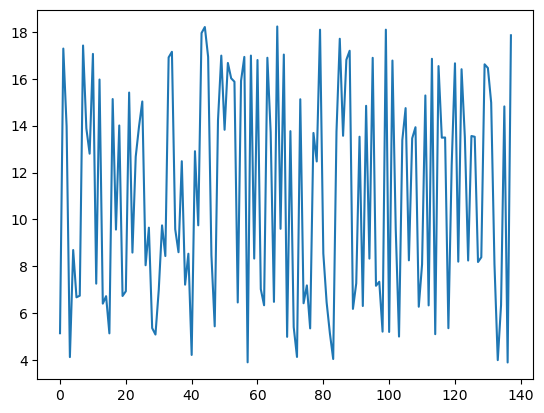

In [3]:
# Plot the losses
plt.plot(losses)
plt.show()

In [7]:
torch.randperm(3)

tensor([2, 1, 0])